In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
import datetime
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings("ignore")

In [2]:
datascience_path = 'base_cursos_alura_data_science.xlsx'
cursos_ds = pd.read_excel(datascience_path).drop(columns={'Unnamed: 0'})
cursos_ds.head()

,Assunto,Nome_Curso,Carga_Horaria,url,contagem_alunos,nota_curso
0,SQL e Banco de Dados,Curso SQL com MySQL: manipule e consulte dados,12h,https://www.alura.com.br/curso-online-mysql-ma...,49100,9.5
1,SQL e Banco de Dados,Curso Consultas SQL: avançando no SQL com MySQL,14h,https://www.alura.com.br/curso-online-mysql-co...,22440,9.5
2,SQL e Banco de Dados,"Curso Oracle Database: projeções, seleções, jo...",18h,https://www.alura.com.br/curso-online-sql-orac...,3329,9.6
3,SQL e Banco de Dados,Curso Comandos DML: manipulação de dados com M...,10h,https://www.alura.com.br/curso-online-mysql-dm...,8373,9.4
4,SQL e Banco de Dados,Curso Procedures SQL: executando código no MySQL,14h,https://www.alura.com.br/curso-online-mysql-pr...,6368,9.4


### Pré-processamento

In [3]:
cursos_ds['Nome_Curso'] = cursos_ds['Nome_Curso'].str.replace('Curso','').str.strip()

In [4]:
cursos_ds.rename(columns={'Nome_Curso':'nome_curso'},inplace=True)

In [5]:
cursos_ds.head()

,Assunto,nome_curso,Carga_Horaria,url,contagem_alunos,nota_curso
0,SQL e Banco de Dados,SQL com MySQL: manipule e consulte dados,12h,https://www.alura.com.br/curso-online-mysql-ma...,49100,9.5
1,SQL e Banco de Dados,Consultas SQL: avançando no SQL com MySQL,14h,https://www.alura.com.br/curso-online-mysql-co...,22440,9.5
2,SQL e Banco de Dados,"Oracle Database: projeções, seleções, joins e ...",18h,https://www.alura.com.br/curso-online-sql-orac...,3329,9.6
3,SQL e Banco de Dados,Comandos DML: manipulação de dados com MySQL,10h,https://www.alura.com.br/curso-online-mysql-dm...,8373,9.4
4,SQL e Banco de Dados,Procedures SQL: executando código no MySQL,14h,https://www.alura.com.br/curso-online-mysql-pr...,6368,9.4


Contando o número de concluintes em cada curso

Para isso, vamos ler a base de atividades_gerais e contar quantos alunos ou quantas datas de fim existem para cada curso, pois nela está todos os cursos concluídos

In [6]:
df = pd.read_csv('../atividades_geral.csv')

In [7]:
qtde_concluintes = df.groupby('nome_curso')['data_fim_curso'].count().reset_index()
qtde_concluintes.columns=['nome_curso','qtde_concluintes']
qtde_concluintes.head()

,nome_curso,qtde_concluintes
0,(I/O) com R: formatos diferentes de entrada e ...,83
1,.NET 5 e EF Core: relacionando entidades,692
2,.NET 5 e Identity: autenticando e autorizando ...,364
3,.NET 5 e Identity: implementando controle de u...,493
4,.NET 6 e Identity: implementando controle de u...,64


Fazendo um merge com os cursos de data science através do campo nome_curso, assim trazendo todos os valores da tabela qtde_concluintes que coincidam com o nome do curso na tabela cursos_ds

In [8]:
cursos_ds_ = pd.merge(cursos_ds,qtde_concluintes,how='left',left_on='nome_curso', right_on='nome_curso')
cursos_ds_.head()

,Assunto,nome_curso,Carga_Horaria,url,contagem_alunos,nota_curso,qtde_concluintes
0,SQL e Banco de Dados,SQL com MySQL: manipule e consulte dados,12h,https://www.alura.com.br/curso-online-mysql-ma...,49100,9.5,8623
1,SQL e Banco de Dados,Consultas SQL: avançando no SQL com MySQL,14h,https://www.alura.com.br/curso-online-mysql-co...,22440,9.5,4008
2,SQL e Banco de Dados,"Oracle Database: projeções, seleções, joins e ...",18h,https://www.alura.com.br/curso-online-sql-orac...,3329,9.6,388
3,SQL e Banco de Dados,Comandos DML: manipulação de dados com MySQL,10h,https://www.alura.com.br/curso-online-mysql-dm...,8373,9.4,2230
4,SQL e Banco de Dados,Procedures SQL: executando código no MySQL,14h,https://www.alura.com.br/curso-online-mysql-pr...,6368,9.4,1551


Criando uma nova coluna para calcular a taxa de conclusão de cada curso

In [9]:
cursos_ds_['taxa_conclusao'] = round((cursos_ds_['qtde_concluintes']/cursos_ds_['contagem_alunos'])*100,1)
cursos_ds_.head(2)

,Assunto,nome_curso,Carga_Horaria,url,contagem_alunos,nota_curso,qtde_concluintes,taxa_conclusao
0,SQL e Banco de Dados,SQL com MySQL: manipule e consulte dados,12h,https://www.alura.com.br/curso-online-mysql-ma...,49100,9.5,8623,17.6
1,SQL e Banco de Dados,Consultas SQL: avançando no SQL com MySQL,14h,https://www.alura.com.br/curso-online-mysql-co...,22440,9.5,4008,17.9


Transformando a coluna Carga_Horaria em numérico

In [10]:
cursos_ds_['Carga_Horaria'] = cursos_ds_['Carga_Horaria'].str.replace('h','').astype(int)

## Analisando os cursos

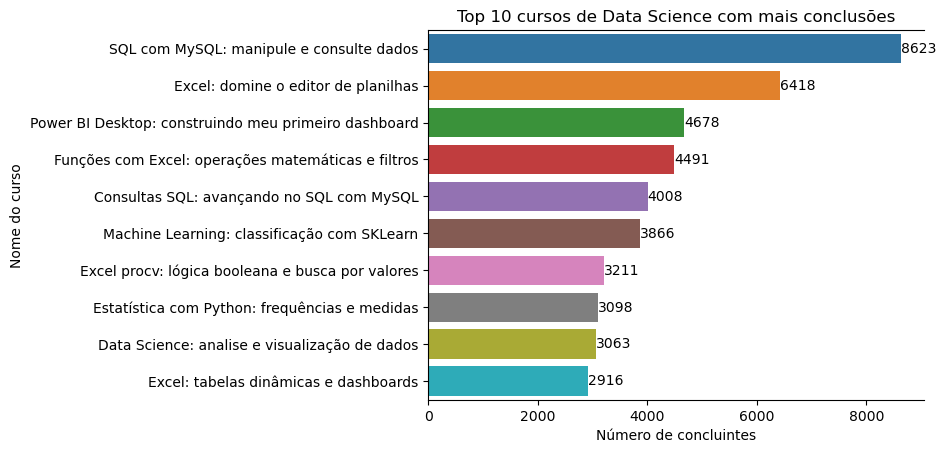

In [68]:
ax = sns.barplot(cursos_ds_,
y='nome_curso',x='qtde_concluintes',
order=cursos_ds_.sort_values('qtde_concluintes',ascending=False)['nome_curso'].values[:10])
ax.bar_label(ax.containers[0],fmt=lambda x: f'{x:.0f}')
ax.spines['right'].set_visible(False)
ax.set_title('Top 10 cursos de Data Science com mais conclusões')
plt.ylabel('Nome do curso')
plt.xlabel('Número de concluintes')
plt.show()

<i>Alguns cursos ficaram com uma taxa de conclusão acima de 100%, isso ocorreu porque a `contagem_alunos` nos cursos é referente ao ano de 2023, mas a quantidade de concluintes está se baseando nos alunos que foram pegos dos fóruns, e tais informações são desde o ano de 2011</i>

De qualquer forma, ainda podemos ter uma noção de quais cursos tem maiores percentuais de conclusão

### Quais os cursos que mais concluem?

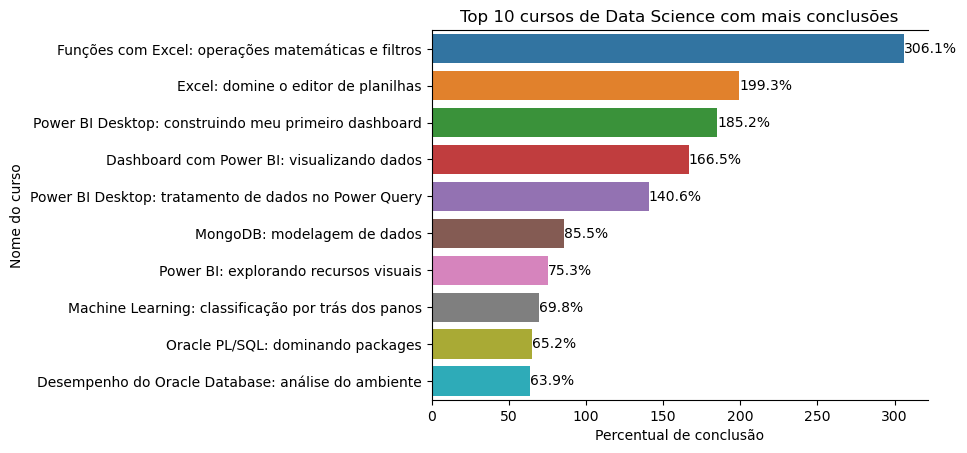

In [67]:
ax = sns.barplot(cursos_ds_,
y='nome_curso',x='taxa_conclusao',
order=cursos_ds_.sort_values('taxa_conclusao',ascending=False)['nome_curso'].values[:10])
ax.bar_label(ax.containers[0],fmt=lambda x: f'{x}%')
ax.spines['right'].set_visible(False)
ax.set_title('Top 10 cursos de Data Science com mais conclusões')
plt.ylabel('Nome do curso')
plt.xlabel('Percentual de conclusão')
plt.show()

#### Insight ✍️

Tem-se uma grande presença de cursos de BI entre os mais concluídos

### Quais os cursos que menos concluem?

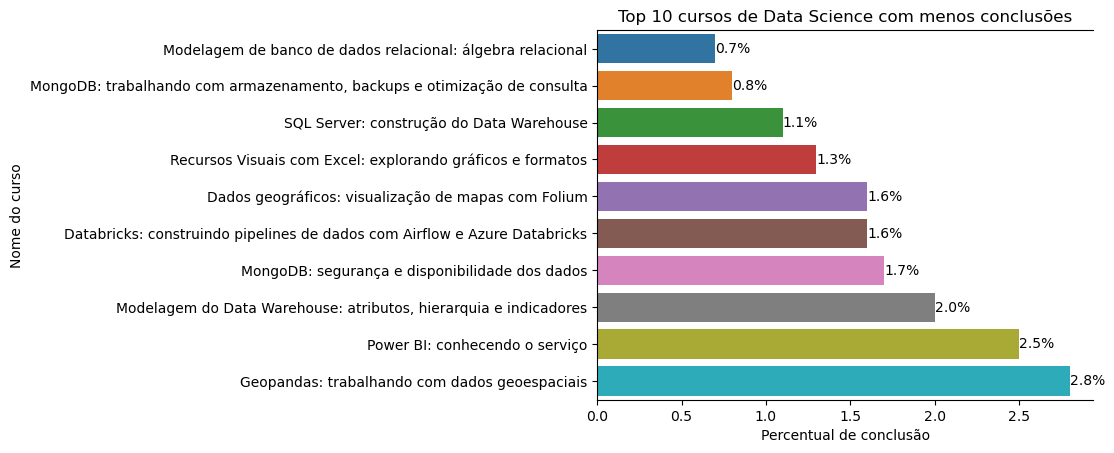

In [70]:
ax = sns.barplot(cursos_ds_[cursos_ds_.taxa_conclusao<=100],
y='nome_curso',x='taxa_conclusao',
order=cursos_ds_[cursos_ds_.taxa_conclusao<=100].sort_values('taxa_conclusao',ascending=True)['nome_curso'].values[:10])
ax.bar_label(ax.containers[0],fmt=lambda x: f'{x}%')
ax.spines['right'].set_visible(False)
ax.set_title('Top 10 cursos de Data Science com menos conclusões')
plt.ylabel('Nome do curso')
plt.xlabel('Percentual de conclusão')
plt.show()

#### Insight ✍️

Entre os menos concluídos, tem-se uma grande presença de cursos relacionados a bancos de dados

### Quais os cursos com as melhores e piores notas?

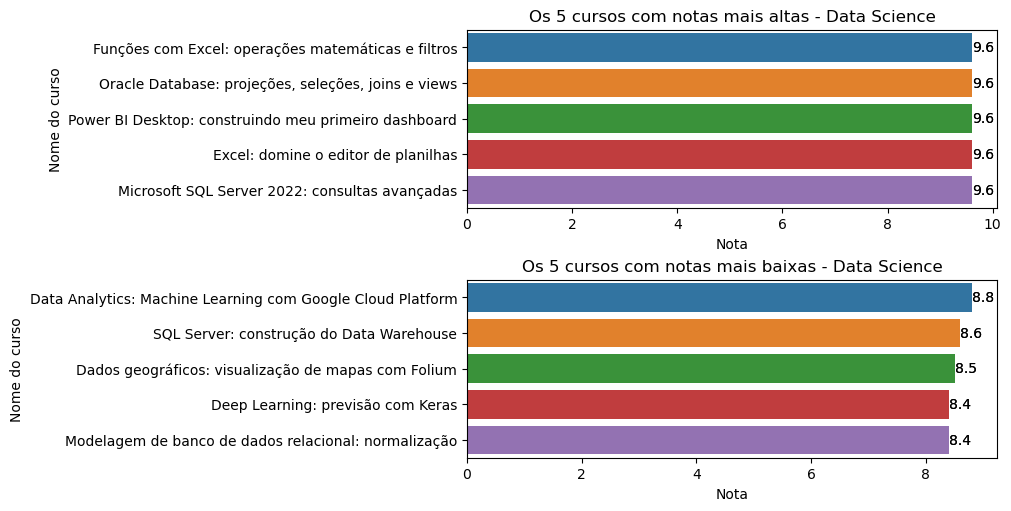

In [71]:
notas = cursos_ds_.sort_values('nota_curso',ascending=False)
fig, axs = plt.subplots(2,1,constrained_layout=True,figsize=(10,5))

sns.barplot(notas.head(),
y='nome_curso',x='nota_curso',ax=axs[0])
axs[0].bar_label(axs[0].containers[0])
axs[0].set_title('Os 5 cursos com notas mais altas - Data Science')
axs[0].bar_label(axs[0].containers[0])
axs[0].set_ylabel('Nome do curso')
axs[0].set_xlabel('Nota')


sns.barplot(notas.tail(),
y='nome_curso',x='nota_curso',ax=axs[1])
axs[1].bar_label(axs[1].containers[0])
axs[1].set_title('Os 5 cursos com notas mais baixas - Data Science')
axs[1].bar_label(axs[1].containers[0])
axs[1].set_ylabel('Nome do curso')
axs[1].set_xlabel('Nota')

fig.show()


### Quais tipos de cursos com mais e menos conclusões?

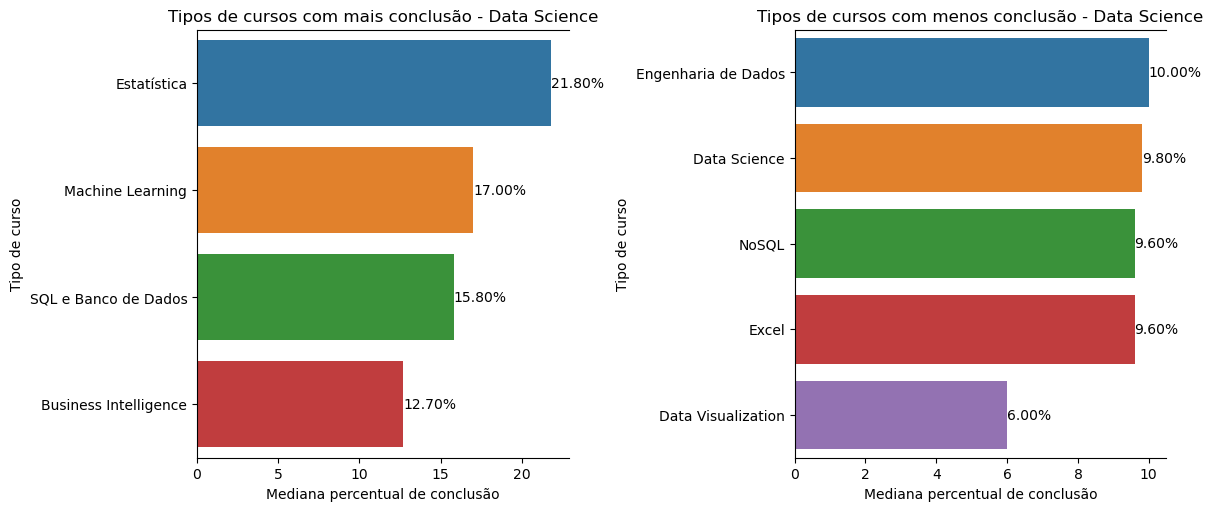

In [11]:
fig, axs = plt.subplots(1,2,constrained_layout=True,figsize=(12,5))

sns.barplot(cursos_ds_.groupby('Assunto',as_index=False)['taxa_conclusao'].median().sort_values('taxa_conclusao',ascending=False).head(4),
y='Assunto',x='taxa_conclusao',ax=axs[0])
axs[0].bar_label(axs[0].containers[0],fmt=lambda x: f'{x:.2f}%')
axs[0].set_title('Tipos de cursos com mais conclusão - Data Science')
axs[0].set_ylabel('Tipo de curso')
axs[0].set_xlabel('Mediana percentual de conclusão')


sns.barplot(cursos_ds_.groupby('Assunto',as_index=False)['taxa_conclusao'].median().sort_values('taxa_conclusao',ascending=False).tail(),
y='Assunto',x='taxa_conclusao',ax=axs[1])
axs[1].bar_label(axs[1].containers[0],fmt=lambda x: f'{x:.2f}%')

axs[0].spines['right'].set_visible(False)
axs[1].spines['right'].set_visible(False)

axs[1].set_title('Tipos de cursos com menos conclusão - Data Science')
axs[1].set_ylabel('Tipo de curso')
axs[1].set_xlabel('Mediana percentual de conclusão')

plt.show()

#### Insight ✍️

Cursos de Engenharia e Visualização de dados têm menos conclusões do que cursos relacionados à Estatística, BI e Machine Learning

### Análise geral da dependência dos cursos para notas, carga horária e tipo

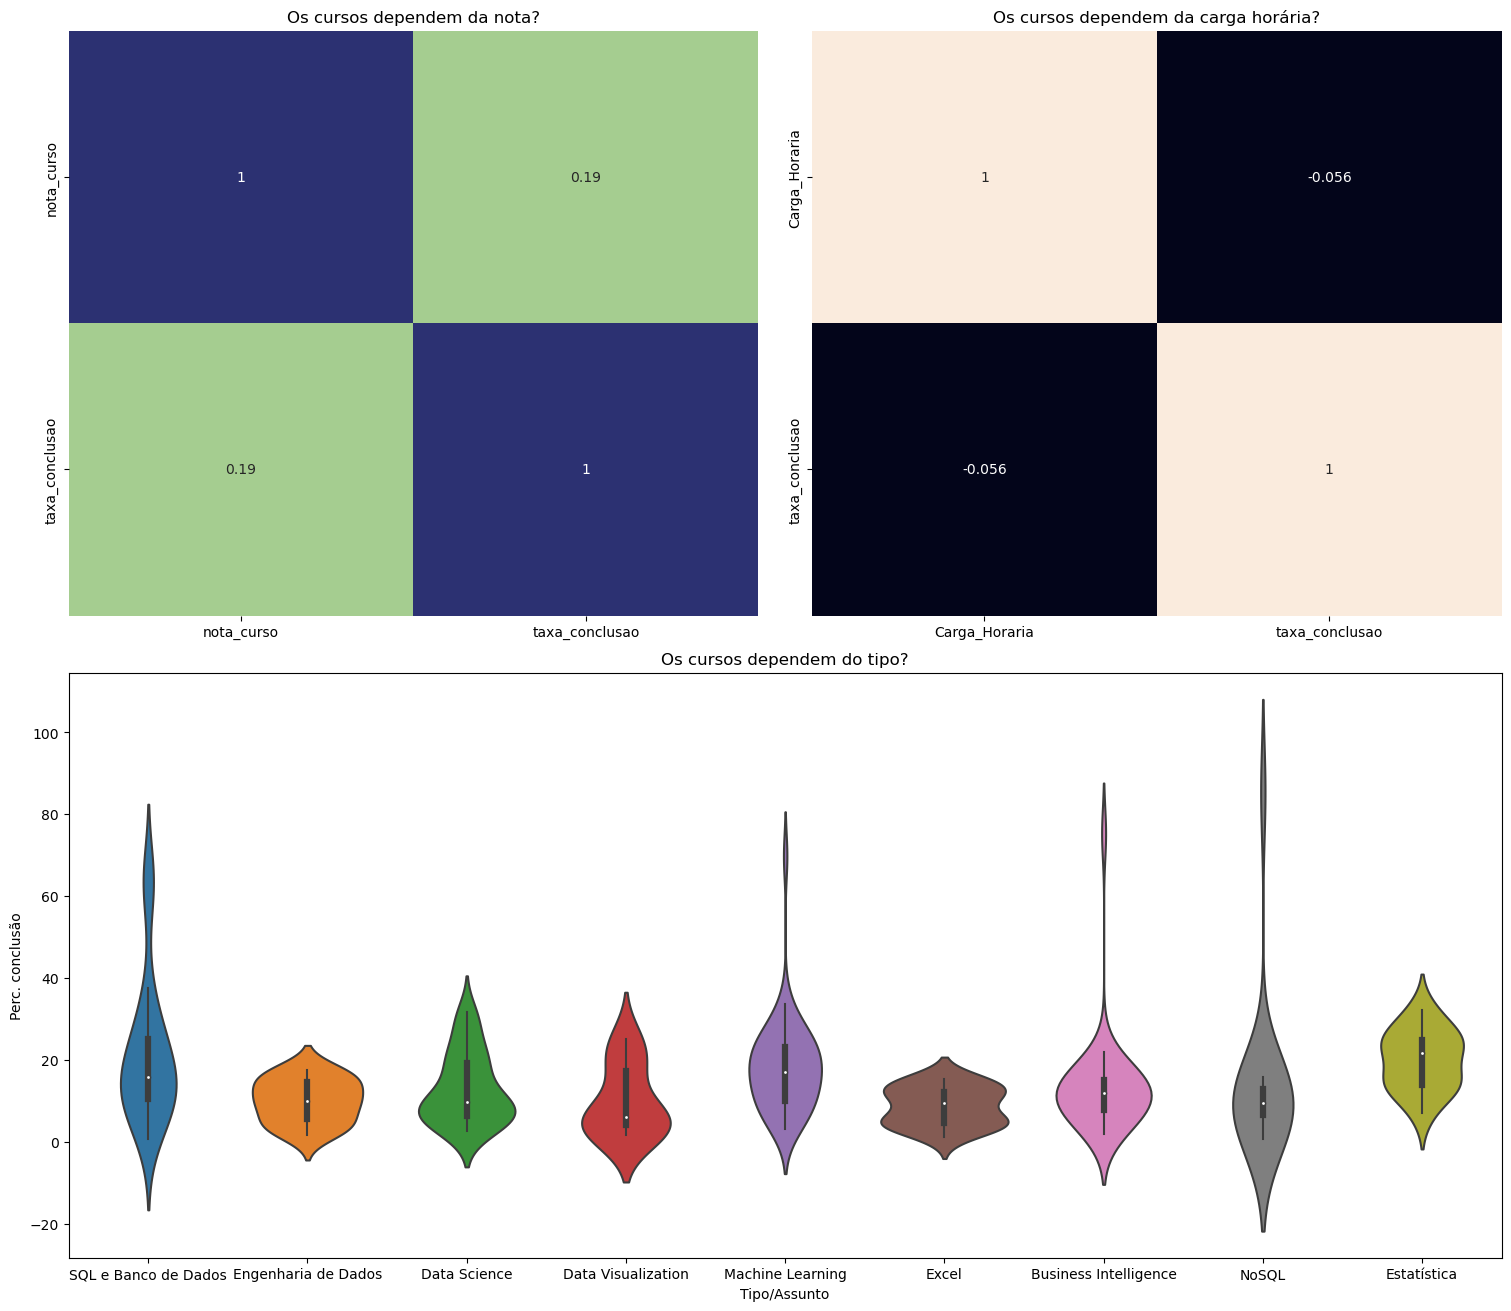

In [35]:
fig = plt.figure(constrained_layout=True, figsize=(15, 13))

gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])


sns.heatmap(cursos_ds_[['nota_curso','taxa_conclusao']].corr(method='pearson'),annot=True,
cbar=False,ax=ax1, cmap="crest")
ax1.set_title('Os cursos dependem da nota?',size=12)
# ax1.set_xlabel('Nota')
# ax1.set_ylabel('Perc. conclusão')

sns.heatmap(cursos_ds_[['Carga_Horaria','taxa_conclusao']].corr(method='pearson'),annot=True,
cbar=False,ax=ax2)
ax2.set_title('Os cursos dependem da carga horária?',size=12)
# ax2.set_xlabel('Carga horária')
# ax2.set_ylabel('Perc. conclusão')


sns.violinplot(cursos_ds_[cursos_ds_.taxa_conclusao<=100],x='Assunto',y='taxa_conclusao',ax=ax3)
ax3.set_title('Os cursos dependem do tipo?',size=12)
ax3.set_xlabel('Tipo/Assunto')
ax3.set_ylabel('Perc. conclusão')

fig.show()

#### Insight ✍️

- Os cursos não dependem da nota, a correlação de 0.19 é muito baixa
- Os cursos não dependem da carga horária, a correlação de -0.056 é muito baixa
- Os cursos não dependem do tipo, a maioria das distribuições estão postas para os intervalos de 0 a 20% de conclusão, então podemos dizer que as probabilidades de conclusão entre os tipos de curso são muito parecidas/próximas umas das outras 